In [1]:
import pandas as pd
df=pd.DataFrame()

In [2]:
df = pd.read_csv('C:/Users/SRTINNI/Desktop/covid_lstm.csv',index_col='Date',parse_dates=True)
df.index.asfreq = 'MS'
df.dtypes

Daily new cases    int64
dtype: object

In [3]:
#df.tail()
df.isnull()

,Daily new cases
Date,
2020-03-15,False
2020-03-16,False
2020-03-17,False
2020-03-18,False
2020-03-19,False
...,...
2021-12-23,False
2021-12-24,False
2021-12-25,False


<AxesSubplot:xlabel='Date'>

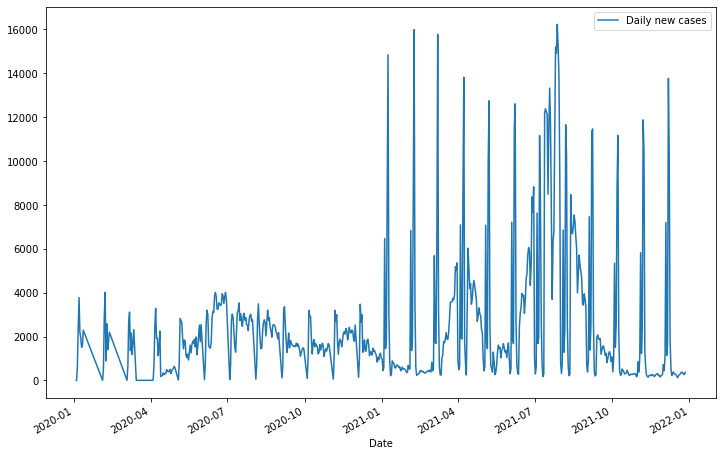

In [4]:
df.columns = ['Daily new cases']
df.plot(figsize=(12,8))

In [5]:
df['Case_LastMonth']=df['Daily new cases'].shift(+1)
df['Case_2Monthsback']=df['Daily new cases'].shift(+2)
df['Case_3Monthsback']=df['Daily new cases'].shift(+3)
df

,Daily new cases,Case_LastMonth,Case_2Monthsback,Case_3Monthsback
Date,,,,
2020-03-15,2,NaN,NaN,NaN
2020-03-16,3,2.0,NaN,NaN
2020-03-17,2,3.0,2.0,NaN
2020-03-18,4,2.0,3.0,2.0
2020-03-19,3,4.0,2.0,3.0
...,...,...,...,...
2021-12-23,382,352.0,291.0,260.0
2021-12-24,342,382.0,352.0,291.0
2021-12-25,275,342.0,382.0,352.0


In [6]:
df=df.dropna()
df

,Daily new cases,Case_LastMonth,Case_2Monthsback,Case_3Monthsback
Date,,,,
2020-03-18,4,2.0,3.0,2.0
2020-03-19,3,4.0,2.0,3.0
2020-03-20,3,3.0,4.0,2.0
2020-03-21,5,3.0,3.0,4.0
2020-03-22,2,5.0,3.0,3.0
...,...,...,...,...
2021-12-23,382,352.0,291.0,260.0
2021-12-24,342,382.0,352.0,291.0
2021-12-25,275,342.0,382.0,352.0


In [7]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [8]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=40,max_features=3, random_state=1)

In [9]:
import numpy as np
x1,x2,x3,y=df['Case_LastMonth'],df['Case_2Monthsback'],df['Case_3Monthsback'],df['Daily new cases']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[  2.   3.   2.]
 [  4.   2.   3.]
 [  3.   4.   2.]
 ...
 [342. 382. 352.]
 [275. 342. 382.]
 [268. 275. 342.]]


In [10]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [11]:
model.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

<ipython-input-11-293373e02e7d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


LinearRegression()

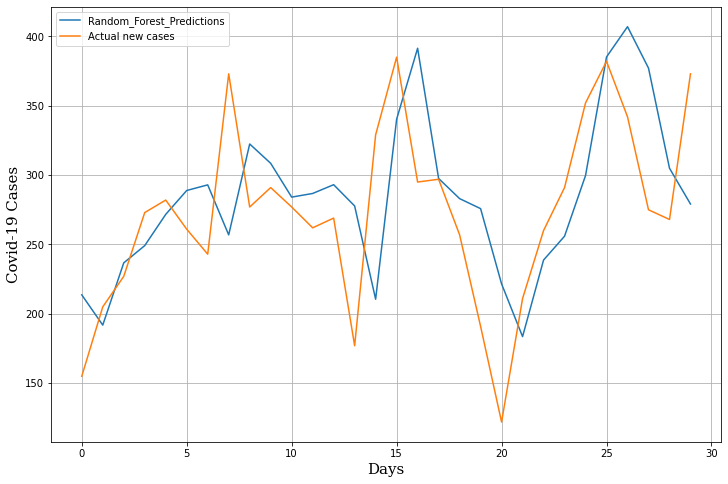

In [12]:
#RF
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual new cases')
plt.legend(loc="upper left")
font2 = {'family':'serif','color':'black','size':15}
plt.xlabel('Days',fontdict = font2)
plt.ylabel('Covid-19 Cases',fontdict = font2)
plt.grid()
plt.show()

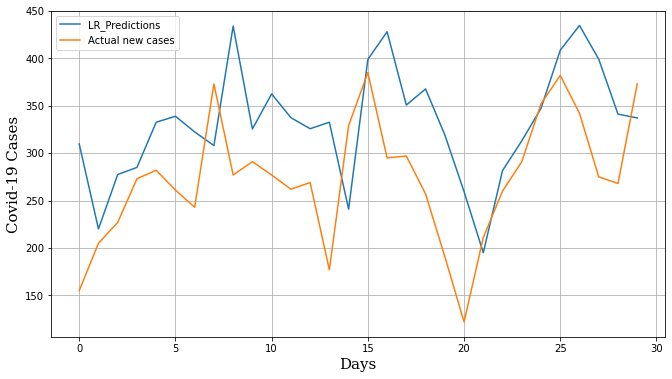

In [14]:
#LR
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='LR_Predictions')
plt.plot(y_test,label='Actual new cases')
plt.legend(loc="upper left")
font2 = {'family':'serif','color':'black','size':15}
plt.xlabel('Days',fontdict = font2)
plt.ylabel('Covid-19 Cases',fontdict = font2)
plt.grid()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [45]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 60.008328415034754
Mean Squared Error for Linear Regression Model is: 85.82205526187029


#### Conclusion: Random forest perfom better for prediction

In [46]:
# Median Absolute Deviation
from statsmodels import robust

In [47]:
#for RF
#with scaling factor 
#robust.mad(pred)

robust.mad(pred,c=1) #without scaling factor 0.67

27.162499999999994

In [48]:
#robust.mad(lin_pred)
robust.mad(lin_pred,c=1)

array([27.2361938])

### RF vs LR

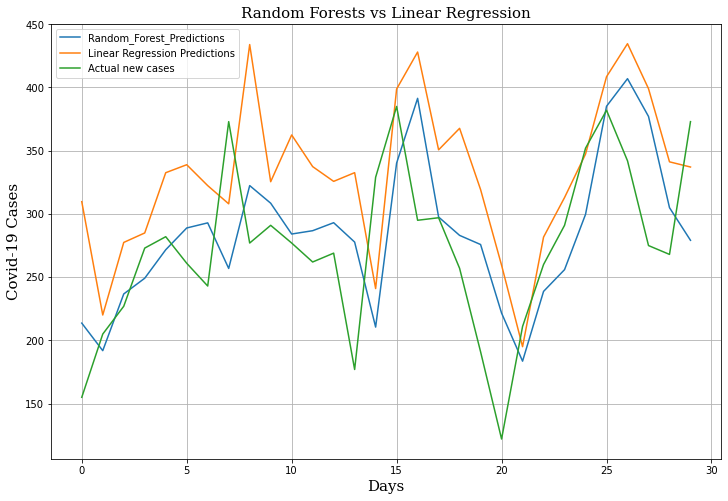

In [57]:
pred=model.predict(X_test)
font2 = {'family':'serif','color':'black','size':15}
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(lin_pred,label='Linear Regression Predictions')
plt.plot(y_test,label='Actual new cases')

plt.legend(loc="upper left")

plt.title('Random Forests vs Linear Regression',fontdict = font2)
plt.xlabel('Days',fontdict = font2)
plt.ylabel('Covid-19 Cases',fontdict = font2)
plt.grid()
plt.show()